In [2]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import scipy
import os
from sklearn.preprocessing import LabelEncoder
import copy
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, accuracy_score
import warnings
warnings.filterwarnings("ignore")
print('import')

import


works part1: database

In [3]:
wow_ah_data = pd.read_csv('./warcraft-avatar-history/wowah_data.csv')
wow_ah_data.rename(columns={' level':'level',' race':'race',
                  ' charclass':'charclass',' zone':'zone',
                  ' guild':'guild',' timestamp':'timestamp'},inplace=True)
wow_ah_data[1000:1500]

,char,level,race,charclass,zone,guild,timestamp
1000,87,70,Tauren,Shaman,Nagrand,19,01/01/08 00:23:23
1001,30078,70,Tauren,Shaman,The Steamvault,5,01/01/08 00:23:23
1002,39365,70,Tauren,Shaman,Netherstorm,35,01/01/08 00:23:23
1003,60179,70,Tauren,Shaman,Arathi Basin,53,01/01/08 00:23:23
1004,4989,70,Tauren,Shaman,The Mechanar,5,01/01/08 00:23:23
1005,16884,70,Tauren,Shaman,The Mechanar,103,01/01/08 00:23:23
1006,22379,70,Tauren,Shaman,The Mechanar,103,01/01/08 00:23:23
1007,19085,70,Tauren,Druid,The Arcatraz,103,01/01/08 00:23:28
1008,6759,70,Tauren,Druid,Blade's Edge Mountains,101,01/01/08 00:23:28
1009,64923,70,Tauren,Druid,Tanaris,103,01/01/08 00:23:28


In [4]:
#Todo: find each day a player log in or not

#Todo: find each player log in how many times in each month

#Todo: find the player's active rate

#Todo: classification by player's location and log in situation

#Todo: Regression on the active value of each player

In [5]:
Y08_M123 = wow_ah_data[0:3749760]
Y08_M123c=Y08_M123.copy()
le=LabelEncoder()
Y08_M123c.zone=le.fit_transform(Y08_M123.zone)
Y08_M123c['race']=Y08_M123['race'].replace({'Orc':1,'Tauren':2,'Troll':3,'Undead':4,'Blood Elf':5})
Y08_M123c['charclass']=Y08_M123['charclass'].replace({'Rogue':1, 'Hunter':2, 
                               'Warrior':3, 'Shaman':4, 
                               'Warlock':5, 'Druid':6,
                               'Priest':7, 'Mage':8, 
                               'Paladin':9})
Y08_M123=Y08_M123c.copy()
Y08_M123.head()

,char,level,race,charclass,zone,guild,timestamp
0,59425,1,1,1,65,165,01/01/08 00:02:04
1,65494,9,1,2,30,-1,01/01/08 00:02:04
2,65325,14,1,3,41,-1,01/01/08 00:02:04
3,65490,18,1,2,41,-1,01/01/08 00:02:04
4,2288,60,1,2,45,-1,01/01/08 00:02:09


In [6]:
# new_dataframe_08Jan = new_dataframe_08Jan[new_dataframe_08Jan[" timestamp"].str.match("02/") != True]

# new_dataframe_08Feb = wow_ah_data[len(new_dataframe_08Jan):2800000]

# new_dataframe_08Feb = new_dataframe_08Feb[new_dataframe_08Feb[" timestamp"].str.match("03/") != True]

# new_dataframe_08Mar = wow_ah_data[len(new_dataframe_08Jan)+len(new_dataframe_08Feb):3950000]

# new_dataframe_08Mar = new_dataframe_08Mar[new_dataframe_08Mar[" timestamp"].str.match("04/") != True]

dw01=Y08_M123[0:307813+1]
dw02=Y08_M123[307813+1:592429+1]
dw03=Y08_M123[592429+1:892950+1]

dw04=Y08_M123[892950+1:1187168+1]

dw05=Y08_M123[1187168+1:1479039+1]
# dw06=Y08_M123[1479039+1:1786414+1]
# dw07=Y08_M123[1786414+1:2078852+1]
# dw08=Y08_M123[2078852+1:2369736+1]
# dw00=Y08_M123[2369736+1:2659919+1]
# dw10=Y08_M123[2659919+1:2940968+1]
# dw11=Y08_M123[2940968+1:3226666+1]
# dw12=Y08_M123[3226666+1:3506542+1]

dw1234=Y08_M123[0:1187168+1]

how_many_10minutes_w1234 = pd.DataFrame(dw1234.groupby('char',as_index=False)['timestamp'].count())
how_many_10minutes_w01 = pd.DataFrame(dw01.groupby('char',as_index=False)['timestamp'].count())
how_many_10minutes_w02 = pd.DataFrame(dw02.groupby('char',as_index=False)['timestamp'].count())
how_many_10minutes_w03 = pd.DataFrame(dw03.groupby('char',as_index=False)['timestamp'].count())
how_many_10minutes_w04 = pd.DataFrame(dw04.groupby('char',as_index=False)['timestamp'].count())
how_many_10minutes_w05 = pd.DataFrame(dw05.groupby('char',as_index=False)['timestamp'].count())

df1 = how_many_10minutes_w1234[~how_many_10minutes_w1234['char'].isin(how_many_10minutes_w01['char'])]
df1['timestamp'] = 0
new_how_many_10minutes_w01=how_many_10minutes_w01.append(df1)

df2 = how_many_10minutes_w1234[~how_many_10minutes_w1234['char'].isin(how_many_10minutes_w02['char'])]
df2['timestamp'] = 0
new_how_many_10minutes_w02=how_many_10minutes_w02.append(df2)

df3 = how_many_10minutes_w1234[~how_many_10minutes_w1234['char'].isin(how_many_10minutes_w03['char'])]
df3['timestamp'] = 0
new_how_many_10minutes_w03=how_many_10minutes_w03.append(df3)

df4 = how_many_10minutes_w1234[~how_many_10minutes_w1234['char'].isin(how_many_10minutes_w04['char'])]
df4['timestamp'] = 0
new_how_many_10minutes_w04=how_many_10minutes_w04.append(df4)

how_many_10minutes_w05 = how_many_10minutes_w05[how_many_10minutes_w05['char'].isin(how_many_10minutes_w1234['char'])]
# print(len(how_many_10minutes_w05)) remove week05's content which doesn't appear in the 4 weeks before
df5 = how_many_10minutes_w1234[~how_many_10minutes_w1234['char'].isin(how_many_10minutes_w05['char'])]
df5['timestamp'] = 0

new_how_many_10minutes_w05=how_many_10minutes_w05.append(df5)

new_how_many_10minutes_w01 = new_how_many_10minutes_w01.sort_values('char').reset_index(drop=True)
new_how_many_10minutes_w02 = new_how_many_10minutes_w02.sort_values('char').reset_index(drop=True)
new_how_many_10minutes_w03 = new_how_many_10minutes_w03.sort_values('char').reset_index(drop=True)

new_how_many_10minutes_w04 = new_how_many_10minutes_w04.sort_values('char').reset_index(drop=True)

new_how_many_10minutes_w05 = new_how_many_10minutes_w05.sort_values('char').reset_index(drop=True)

new_how_many_10minutes_w02['decreasing_time'] = new_how_many_10minutes_w02['timestamp'] - new_how_many_10minutes_w01['timestamp']

new_how_many_10minutes_w03['decreasing_time'] = new_how_many_10minutes_w03['timestamp'] - new_how_many_10minutes_w02['timestamp']

new_how_many_10minutes_w04['decreasing_time'] = new_how_many_10minutes_w04['timestamp'] - new_how_many_10minutes_w03['timestamp']

new_how_many_10minutes_w05['decreasing_time'] = new_how_many_10minutes_w05['timestamp'] - new_how_many_10minutes_w04['timestamp']

new_how_many_10minutes_w02.head()



# l1=[]
# l2=[]
# l3=[]
# l4=[]
# l5=[]
# l6=[]
# l7=[]
# l8=[]
# l9=[]
# l10=[]
# for i in dw12345.char.unique():
#     if i not in dw01.char.unique():
#         l1.append(i)
#         l2.append(0)
#     if i not in dw02.char.unique():
#         l3.append(i)
#         l4.append(0)
#     if i not in dw03.char.unique():
#         l5.append(i)
#         l6.append(0)
#     if i not in dw04.char.unique():
#         l7.append(i)
#         l8.append(0)
#     if i not in dw05.char.unique():
#         l9.append(i)
#         l10.append(0)
        
# how_many_10minutes_w01 = pd.DataFrame(dw01.groupby('char',as_index=False)['timestamp'].count())
# how_many_10minutes_w02 = pd.DataFrame(dw02.groupby('char',as_index=False)['timestamp'].count())
# how_many_10minutes_w03 = pd.DataFrame(dw03.groupby('char',as_index=False)['timestamp'].count())
# how_many_10minutes_w04 = pd.DataFrame(dw04.groupby('char',as_index=False)['timestamp'].count())
# how_many_10minutes_w05 = pd.DataFrame(dw05.groupby('char',as_index=False)['timestamp'].count())
# df1=pd.DataFrame({'char':l1,'timestamp':l2})
# df2=pd.DataFrame({'char':l3,'timestamp':l4})
# df3=pd.DataFrame({'char':l5,'timestamp':l6})
# df4=pd.DataFrame({'char':l7,'timestamp':l8})
# df5=pd.DataFrame({'char':l9,'timestamp':l10})
# how_many_10minutes_w01=how_many_10minutes_w01.append(df1)
# how_many_10minutes_w02=how_many_10minutes_w02.append(df2)
# how_many_10minutes_w03=how_many_10minutes_w03.append(df3)
# how_many_10minutes_w04=how_many_10minutes_w04.append(df4)
# how_many_10minutes_w05=how_many_10minutes_w05.append(df5)





# how_many_10minutes_w01 = pd.DataFrame(dw01.groupby('char')['timestamp'].count())

# level_change_w01 = pd.DataFrame(dw01.groupby('char')[' level'].unique().apply(list))
# guild_condition_w01 = pd.DataFrame(dw01.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w01 = pd.DataFrame(dw01.groupby('char')[' zone'].unique().apply(list))





# how_many_10minutes_w02 = pd.DataFrame(dw02.groupby('char')['timestamp'].count())

# level_change_w02 = pd.DataFrame(dw02.groupby('char')[' level'].unique().apply(list))
# guild_condition_w02 = pd.DataFrame(dw02.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w02 = pd.DataFrame(dw02.groupby('char')[' zone'].unique().apply(list))





# how_many_10minutes_w03 = pd.DataFrame(dw03.groupby('char')['timestamp'].count())

# level_change_w03 = pd.DataFrame(dw03.groupby('char')[' level'].unique().apply(list))
# guild_condition_w03 = pd.DataFrame(dw03.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w03 = pd.DataFrame(dw03.groupby('char')[' zone'].unique().apply(list))





# how_many_10minutes_w04 = pd.DataFrame(dw04.groupby('char')['timestamp'].count())

# level_change_w04 = pd.DataFrame(dw04.groupby('char')[' level'].unique().apply(list))
# guild_condition_w04 = pd.DataFrame(dw04.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w04 = pd.DataFrame(dw04.groupby('char')[' zone'].unique().apply(list))





# how_many_10minutes_w05 = pd.DataFrame(dw05.groupby('char')['timestamp'].count())

# level_change_w05 = pd.DataFrame(dw05.groupby('char')[' level'].unique().apply(list))
# guild_condition_w05 = pd.DataFrame(dw05.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w05 = pd.DataFrame(dw05.groupby('char')[' zone'].unique().apply(list))





# how_many_10minutes_w06 = pd.DataFrame(dw06.groupby('char')[' timestamp'].count())

# level_change_w06 = pd.DataFrame(dw06.groupby('char')[' level'].unique().apply(list))
# guild_condition_w06 = pd.DataFrame(dw06.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w06 = pd.DataFrame(dw06.groupby('char')[' zone'].unique().apply(list))





# how_many_10minutes_w07 = pd.DataFrame(dw07.groupby('char')[' timestamp'].count())

# level_change_w07 = pd.DataFrame(dw07.groupby('char')[' level'].unique().apply(list))
# guild_condition_w07 = pd.DataFrame(dw07.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w07 = pd.DataFrame(dw07.groupby('char')[' zone'].unique().apply(list))







# how_many_10minutes_w08 = pd.DataFrame(dw08.groupby('char')[' timestamp'].count())

# level_change_w08 = pd.DataFrame(dw08.groupby('char')[' level'].unique().apply(list))
# guild_condition_w08 = pd.DataFrame(dw08.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w08 = pd.DataFrame(dw08.groupby('char')[' zone'].unique().apply(list))









# how_many_10minutes_w00 = pd.DataFrame(dw00.groupby('char')[' timestamp'].count())

# level_change_w00 = pd.DataFrame(dw00.groupby('char')[' level'].unique().apply(list))
# guild_condition_w00 = pd.DataFrame(dw00.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w00 = pd.DataFrame(dw00.groupby('char')[' zone'].unique().apply(list))










# how_many_10minutes_w10 = pd.DataFrame(dw10.groupby('char')[' timestamp'].count())

# level_change_w10 = pd.DataFrame(dw10.groupby('char')[' level'].unique().apply(list))
# guild_condition_w10 = pd.DataFrame(dw10.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w10 = pd.DataFrame(dw10.groupby('char')[' zone'].unique().apply(list))








# how_many_10minutes_w11 = pd.DataFrame(dw11.groupby('char')[' timestamp'].count())

# level_change_w11 = pd.DataFrame(dw11.groupby('char')[' level'].unique().apply(list))
# guild_condition_w11 = pd.DataFrame(dw11.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w11 = pd.DataFrame(dw11.groupby('char')[' zone'].unique().apply(list))









# how_many_10minutes_w12 = pd.DataFrame(dw12.groupby('char')[' timestamp'].count())

# level_change_w12 = pd.DataFrame(dw12.groupby('char')[' level'].unique().apply(list))
# guild_condition_w12 = pd.DataFrame(dw12.groupby('char')[' guild'].unique().apply(list))
# zone_log_in_w12 = pd.DataFrame(dw12.groupby('char')[' zone'].unique().apply(list))

,char,timestamp,decreasing_time
0,7,0,0
1,9,197,-19
2,19,166,160
3,21,41,-34
4,22,0,0


In [7]:
# Regession before classify player into classes

regression1 = {'2':new_how_many_10minutes_w02['decreasing_time'], '3':new_how_many_10minutes_w03['decreasing_time'] ,'4':new_how_many_10minutes_w04['decreasing_time']}

dfregressionX = pd.DataFrame(regression1, columns= ['2', '3', '4'])

regression2 = {'5':new_how_many_10minutes_w05['decreasing_time']}

dfregressionY = pd.DataFrame(regression2, columns= ['5'])

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(dfregressionX, dfregressionY, train_size=0.81,test_size=0.19, random_state=1)

dfSVR = sklearn.svm.SVR()

dfSVR.fit(X_train, y_train)

print("the score is: ", dfSVR.score(X_train, y_train))

# dflinear = sklearn.linear_model.LinearRegression()

# dflinear.fit(X_train, y_train)

# pd.DataFrame(dflinear.predict(X_test))

# print("the score is: ", dflinear.score(X_test, y_test))

# dfdecisiontree = sklearn.tree.DecisionTreeRegressor()
# dfdecisiontree.fit(X_train, y_train)
# # pd.DataFrame(dfdecisiontree.predict(X_test))
# print("the score is: ", dfdecisiontree.score(X_test, y_test))

# y_test

the score is:  0.017959236640568865


In [8]:
df1234=dw1234.groupby('char',as_index=False)['race','charclass','level'].mean()
df1234.rename(columns={'level':'meanlevel'},inplace=True)
df1234['meanlevel']=round(df1234['meanlevel'],2)
df1234['maxlevel']=dw1234.groupby('char',as_index=False)['level'].agg(max).level
df1234['minlevel']=dw1234.groupby('char',as_index=False)['level'].agg(min).level
df1234['levelup']=df1234['maxlevel']-df1234['minlevel']
df1234['guild']=dw1234.groupby('char',as_index=False)['guild'].apply(lambda x: Counter(x).most_common()[0][0])
df1234['zone']=dw1234.groupby('char',as_index=False)['zone'].apply(lambda x: Counter(x).most_common()[0][0])
df1234['soloplayer']=dw1234.groupby('char',as_index=False)['guild'].agg(max).guild.apply(lambda x: 0 if x!=-1 else 1)
df1234['w1_active']=new_how_many_10minutes_w01['timestamp']
df1234[['12_decrease','w2_active']]=new_how_many_10minutes_w02[['decreasing_time','timestamp']]
df1234[['23_decrease','w3_active']]=new_how_many_10minutes_w03[['decreasing_time','timestamp']]
df1234[['34_decrease','w4_active']]=new_how_many_10minutes_w04[['decreasing_time','timestamp']]
df1234['qikeng']=df1234['w4_active'].apply(lambda x: 0 if x!=0 else 1)
print('qikeng rate:',len(df1234[df1234.qikeng==1])/len(df1234)*100,'%')
df1234.head()

qikeng rate: 40.67489114658926 %


,char,race,charclass,meanlevel,maxlevel,minlevel,levelup,guild,zone,soloplayer,w1_active,12_decrease,w2_active,23_decrease,w3_active,34_decrease,w4_active,qikeng
0,7,1.0,2.0,57.30,60,54,6,282,117,0,0,0,0,172,172,-113,59,0
1,9,1.0,2.0,70.00,70,70,0,79,80,0,216,-19,197,-71,126,51,177,0
2,19,1.0,1.0,69.93,70,69,1,-1,60,0,6,160,166,-19,147,36,183,0
3,21,1.0,2.0,70.00,70,70,0,205,18,0,75,-34,41,-12,29,6,35,0
4,22,1.0,3.0,62.00,62,62,0,5,121,0,0,0,0,15,15,-15,0,1


In [9]:
x=df1234.drop(['char','34_decrease','w4_active','qikeng'],axis=1)
y=df1234['qikeng']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

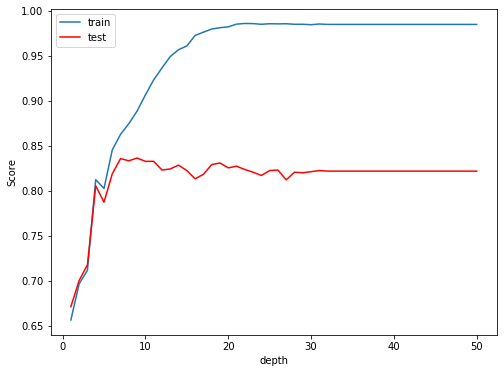

The best max_depth is 9 and score is 0.8367593712212817 .


In [10]:
n=50 # max_depth range of RandomForestClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=RandomForestClassifier(max_depth=i,random_state=7)
    m.fit(x_train,y_train)
    train[i-1]=m.score(x_train,y_train)
    test[i-1]=m.score(x_test,y_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel("depth")
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best max_depth is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
ger = max(test)

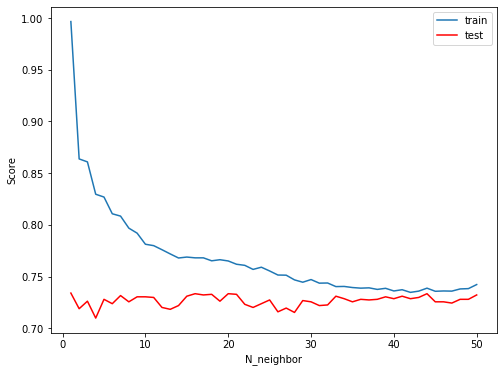

The best n is 1 and score is 0.7339782345828295 .


In [11]:
n=50 # n_neighbors range of KNeighborsClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x_train,y_train)
    train[i-1]=m.score(x_train,y_train)
    test[i-1]=m.score(x_test,y_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel('N_neighbor')
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best n is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
gek = max(test)

[[ 11.9636287  -42.67877577]
 [187.73147341 264.96561664]]


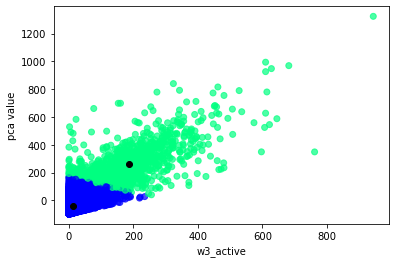

In [12]:
pca=PCA(n_components=1)
d1=pca.fit_transform(df1234.drop(['char','34_decrease','w4_active','qikeng'],axis=1))
d=df1234[['w3_active']]
d['pca']=d1
km=KMeans(n_clusters=2)
clusters=km.fit(d) # 这里可以用d1 然后下面染色 c = clusters.predict(d1) 而不是d， 就可以展示整个dataset划分的结果而且可以可视化
# 但是为了更牛逼的效果 你也许可以试试3670那个3D作图
# 但估计会很难

plt.scatter(d['w3_active'],d['pca'],c=clusters.predict(d),cmap='winter',label='Data points',alpha=0.7)
plt.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], c='k',label='Cluster center')
print(clusters.cluster_centers_)
plt.xlabel('w3_active')
plt.ylabel('pca value')
plt.show()

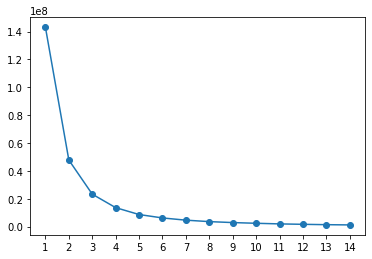

In [13]:
sse = []
for i in range(1,15):
    km =  KMeans(n_clusters=i)
    km.fit(d1)
    sse.append(km.inertia_)
plt.plot(range(1,15),sse,marker='o')
plt.xticks(range(1,15))
plt.show()

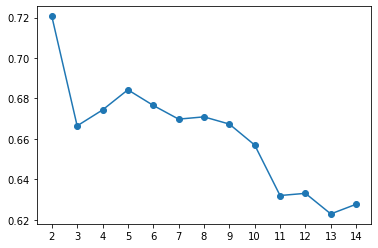

In [14]:
coeff = []
for i in range(2,15):
    km =  KMeans(n_clusters=i)
    km.fit(d1)
    coeff.append(silhouette_score(d1,km.labels_))
plt.plot(range(2,15),coeff,marker='o')            
plt.xticks(range(2,15))
plt.show()

In [15]:
df1234_divide_class = df1234.drop(['char','34_decrease','w4_active','qikeng'],axis=1)
clusters.fit(df1234_divide_class)
df1234['group']=clusters.predict(df1234_divide_class)
g1=df1234[df1234.group==0]
g2=df1234[df1234.group==1]

x1=g1.drop(['char','34_decrease','w4_active','qikeng','group'],axis=1)
y1=g1['qikeng']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=7)

x2=g2.drop(['char','34_decrease','w4_active','qikeng','group'],axis=1)
y2=g2['qikeng']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=7)

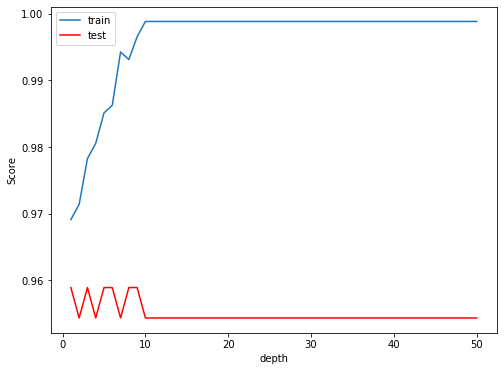

The best max_depth is 1 and score is 0.958904109589041 .


In [16]:
n=50 # max_depth range of RandomForestClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=RandomForestClassifier(max_depth=i,random_state=7)
    m.fit(x1_train,y1_train)
    train[i-1]=m.score(x1_train,y1_train)
    test[i-1]=m.score(x1_test,y1_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel("depth")
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best max_depth is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x1_r = max(test)

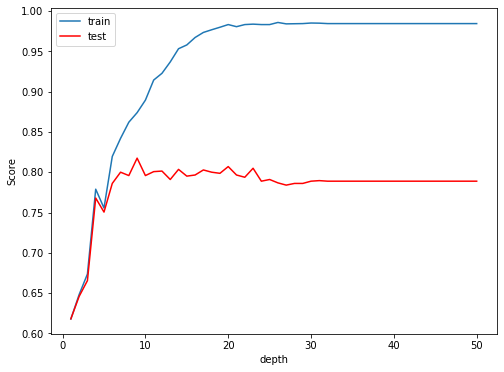

The best max_depth is 9 and score is 0.8174216027874565 .


In [17]:
n=50 # max_depth range of RandomForestClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=RandomForestClassifier(max_depth=i,random_state=7)
    m.fit(x2_train,y2_train)
    train[i-1]=m.score(x2_train,y2_train)
    test[i-1]=m.score(x2_test,y2_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel("depth")
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best max_depth is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x2_r = max(test)

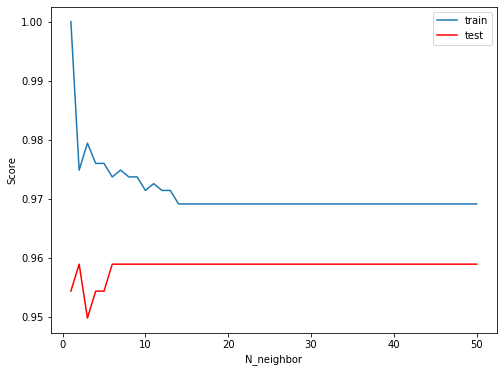

The best n is 2 and score is 0.958904109589041 .


In [18]:
n=50 # n_neighbors range of KNeighborsClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x1_train,y1_train)
    train[i-1]=m.score(x1_train,y1_train)
    test[i-1]=m.score(x1_test,y1_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel('N_neighbor')
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best n is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x1_k = max(test)

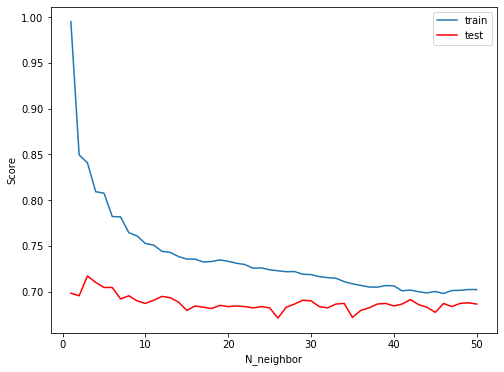

The best n is 3 and score is 0.7170731707317073 .


In [19]:
n=50 # n_neighbors range of KNeighborsClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x2_train,y2_train)
    train[i-1]=m.score(x2_train,y2_train)
    test[i-1]=m.score(x2_test,y2_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel('N_neighbor')
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best n is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x2_k= max(test)

g2 qikeng ratio:  46.36933797909408 %
g1 qikeng ratio:  3.293687099725526 %
overall qikeng ratio:  40.67489114658926 %
average randomforest score for splited dataset:  0.8361250836696689
average kneighbour score for splited dataset:  0.7490423550775063
0.958904109589041 0.1221447383677593 0.8174216027874565 -0.019337768433825286 0.8367593712212817 0.958904109589041 0.22492587500621153 0.7170731707317073 -0.016905063851122226 0.7339782345828295


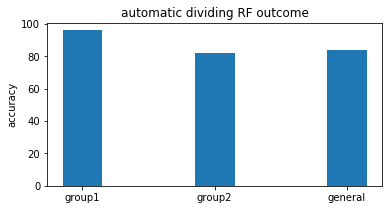

In [20]:
# print(len(g1))
# print(len(g2))
# print(len(df1234))
print("g2 qikeng ratio: ", len(g2[g2['qikeng']==1])/len(g2)*100, "%")
print("g1 qikeng ratio: ", len(g1[g1['qikeng']==1])/len(g1)*100, "%")
print("overall qikeng ratio: ", len(df1234[df1234['qikeng']==1])/len(df1234)*100, "%")

print("average randomforest score for splited dataset: ", len(g2)/len(df1234)*x2_r+len(g1)/len(df1234)*x1_r)

print("average kneighbour score for splited dataset: ", len(g2)/len(df1234)*x2_k+len(g1)/len(df1234)*x1_k)

x = ["group1", "group2","general"]

y = [x1_r*100,x2_r*100,(len(g2)/len(df1234)*x2_r+len(g1)/len(df1234)*x1_r)*100]

print(x1_r,x1_r-ger,x2_r,x2_r-ger, ger,x1_k,x1_k-gek,x2_k,x2_k-gek, gek)

plt.figure(figsize=(6,3))
plt.bar(x,y,width=0.3)
plt.ylabel("accuracy")
plt.title("automatic dividing RF outcome")
plt.show()
# plt.title("automatic dividing Kneighbors outcome")

In [21]:
x=df1234.drop(['char','34_decrease','w4_active','qikeng'],axis=1)
y=df1234['w4_active']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

x1=g1.drop(['char','34_decrease','w4_active','qikeng'],axis=1)
y1=g1['w4_active']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=7)

x2=g2.drop(['char','34_decrease','w4_active','qikeng'],axis=1)
y2=g2['w4_active']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=7)

regression1 = sklearn.svm.SVR()
regression2 = sklearn.linear_model.LinearRegression()
regression3 = sklearn.tree.DecisionTreeRegressor()

regression2.fit(x1_train, y1_train)

print("the score for group 1 is: ", regression2.score(x1_test, y1_test))

regression2.fit(x2_train, y2_train)

print("the score for group 2 is: ", regression2.score(x2_test, y2_test))

regression2.fit(x_train, y_train)

print("the score for all dataset is: ", regression2.score(x_test, y_test))

# print(y_test)

pd.DataFrame(regression2.predict(x_test)).head()

the score for group 1 is:  0.17758217388248476
the score for group 2 is:  0.4334684232580005
the score for all dataset is:  0.7066622072542668


,0
0,-2.999186
1,158.292140
2,16.261051
3,-1.220669
4,4.975251


max active rate:  27.96
min active rate:  0.01
mean active rate:  1.4430152394775333


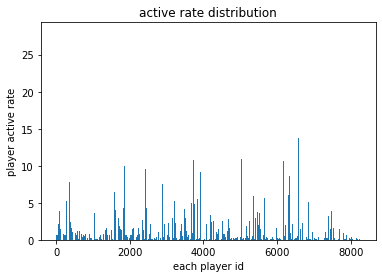

8268 8268 8268


,char,race,charclass,meanlevel,maxlevel,minlevel,levelup,guild,zone,soloplayer,w1_active,12_decrease,w2_active,23_decrease,w3_active,34_decrease,w4_active,qikeng,ratio,group
155,528,3.0,1.0,7.0,7,7,0,-1,65,1,1,0,1,-1,0,0,0,1,0.08,0.0
242,887,3.0,1.0,1.0,1,1,0,-1,65,0,3,-1,2,-1,1,-1,0,1,0.05,0.0
266,988,1.0,2.0,2.0,2,2,0,-1,65,1,1,-1,0,0,0,0,0,1,0.02,0.0
289,1116,1.0,4.0,6.0,6,6,0,-1,65,1,2,-2,0,0,0,3,3,0,0.06,0.0
323,1272,1.0,2.0,3.0,3,3,0,-1,65,1,0,0,0,2,2,-2,0,1,0.07,0.0


In [28]:
newdf1234=df1234.drop(['group'], axis = 1)

newdf1234_divide = newdf1234.drop(['char','34_decrease','w4_active','qikeng'],axis=1)

newdf1234_divide.head()

newdf1234['ratio'] = newdf1234['w1_active']+newdf1234['w2_active']+newdf1234['w3_active']+newdf1234['12_decrease']+newdf1234['23_decrease']+newdf1234['maxlevel']+newdf1234['levelup']

newdf1234['ratio'] = newdf1234['ratio']/100

print("max active rate: ", max(newdf1234['ratio']))
print("min active rate: ", min(newdf1234['ratio']))
print("mean active rate: ", np.mean(newdf1234['ratio']))
# print((max(newdf1234['ratio'])+min(newdf1234['ratio']))/2)
plt.bar(list(range(0,len(newdf1234['ratio']))),newdf1234['ratio'])
plt.xlabel("each player id")
plt.ylabel("player active rate")
plt.title("active rate distribution")
plt.show()

newdf1234.loc[newdf1234['ratio'] < 0.09, 'group'] = 0
newdf1234.loc[newdf1234['ratio'] >= 0.09, 'group'] = 1
newdf1234.loc[newdf1234['ratio'] > 1.69, 'group'] = 2

newg1=newdf1234[newdf1234.group==0]
newg2=newdf1234[newdf1234.group==1]
newg3=newdf1234[newdf1234.group==2]
print(len(newg1)+len(newg2)+len(newg3), len(df1234), len(newdf1234))
x1=newg1.drop(['char','34_decrease','w4_active','qikeng','group','ratio'],axis=1)
y1=newg1['qikeng']
x1_train,x1_test,y1_train,y1_test=train_test_split(x1,y1,test_size=0.2,random_state=7)

x2=newg2.drop(['char','34_decrease','w4_active','qikeng','group','ratio'],axis=1)
y2=newg2['qikeng']
x2_train,x2_test,y2_train,y2_test=train_test_split(x2,y2,test_size=0.2,random_state=7)

x3=newg3.drop(['char','34_decrease','w4_active','qikeng','group','ratio'],axis=1)
y3=newg3['qikeng']
x3_train,x3_test,y3_train,y3_test=train_test_split(x3,y3,test_size=0.2,random_state=7)

newg1.head()

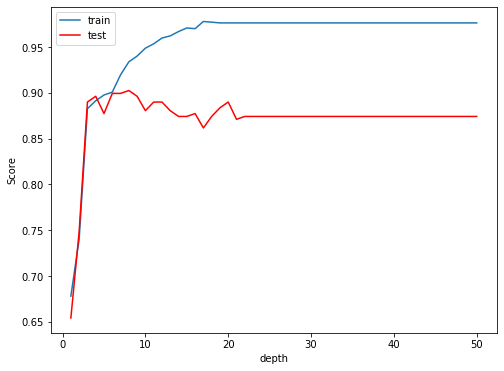

The best max_depth is 8 and score is 0.9025157232704403 .


In [22]:
n=50 # max_depth range of RandomForestClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=RandomForestClassifier(max_depth=i,random_state=7)
    m.fit(x1_train,y1_train)
    train[i-1]=m.score(x1_train,y1_train)
    test[i-1]=m.score(x1_test,y1_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel("depth")
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best max_depth is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x1_r = max(test)

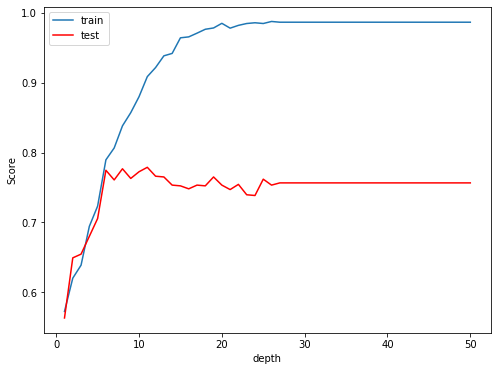

The best max_depth is 11 and score is 0.7789585547290117 .


In [23]:
n=50 # max_depth range of RandomForestClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=RandomForestClassifier(max_depth=i,random_state=7)
    m.fit(x2_train,y2_train)
    train[i-1]=m.score(x2_train,y2_train)
    test[i-1]=m.score(x2_test,y2_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel("depth")
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best max_depth is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x2_r = max(test)

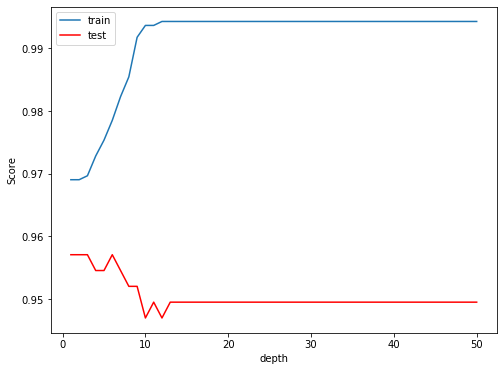

The best max_depth is 1 and score is 0.9570707070707071 .


In [24]:
n=50 # max_depth range of RandomForestClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=RandomForestClassifier(max_depth=i,random_state=7)
    m.fit(x3_train,y3_train)
    train[i-1]=m.score(x3_train,y3_train)
    test[i-1]=m.score(x3_test,y3_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel("depth")
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best max_depth is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x3_r = max(test)

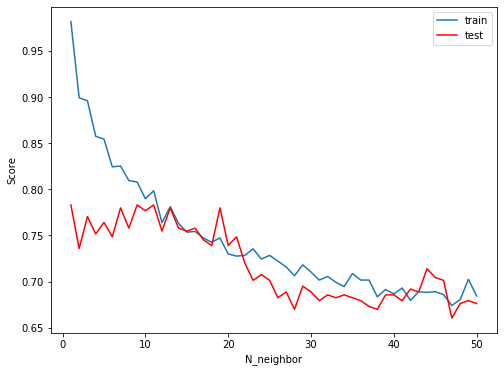

The best n is 1 and score is 0.7830188679245284 .


In [25]:
n=50 # n_neighbors range of KNeighborsClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x1_train,y1_train)
    train[i-1]=m.score(x1_train,y1_train)
    test[i-1]=m.score(x1_test,y1_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel('N_neighbor')
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best n is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x1_k = max(test)

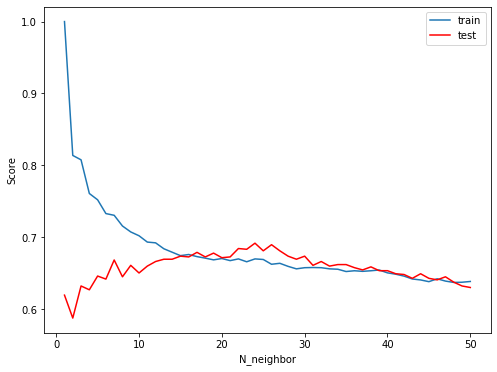

The best n is 24 and score is 0.691817215727949 .


In [26]:
n=50 # n_neighbors range of KNeighborsClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x2_train,y2_train)
    train[i-1]=m.score(x2_train,y2_train)
    test[i-1]=m.score(x2_test,y2_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel('N_neighbor')
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best n is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x2_k = max(test)

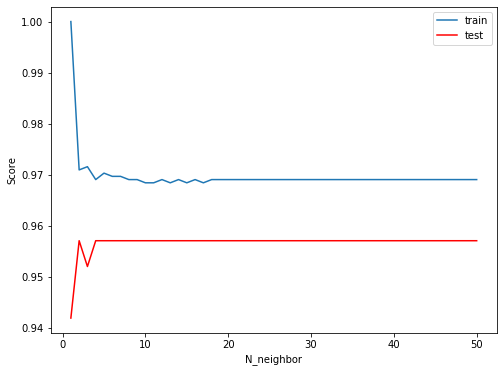

The best n is 2 and score is 0.9570707070707071 .


In [27]:
n=50 # n_neighbors range of KNeighborsClassifier
train=np.zeros(n)
test=np.zeros(n)
for i in np.arange(n)+1:
    m=KNeighborsClassifier(n_neighbors=i)
    m.fit(x3_train,y3_train)
    train[i-1]=m.score(x3_train,y3_train)
    test[i-1]=m.score(x3_test,y3_test)
plt.figure(figsize=[8,6])
plt.plot(np.arange(n)+1,train,label='train')
plt.plot(np.arange(n)+1,test,c='r',label='test')
plt.xlabel('N_neighbor')
plt.ylabel("Score")
plt.legend()
plt.show()
print("The best n is",test.tolist().index(max(test))+1,"and score is",max(test),'.')
x3_k = max(test)

g1 qikeng ratio:  62.59445843828715 %
g2 qikeng ratio:  48.98957668581153 %
g3 qikeng ratio:  3.335017685699848 %
overall qikeng ratio:  40.67489114658926 %
average randomforest score for splited dataset:  0.8453219718949531
average kneighbour score for splited dataset:  0.7728240956330634
0.9025157232704403 0.06575635204915853 0.7789585547290117 -0.05780081649227009 0.9570707070707071 0.12031133584942533 0.8367593712212817 0.7830188679245284 0.049040633341698836 0.691817215727949 -0.04216101885488055 0.9570707070707071 0.22309247248787756 0.7339782345828295


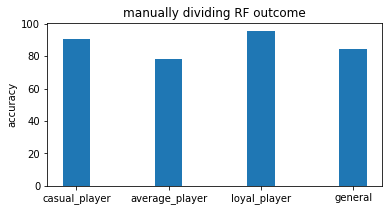

In [28]:
print("g1 qikeng ratio: ", len(newg1[newg1['qikeng']==1])/len(newg1)*100, "%")
print("g2 qikeng ratio: ", len(newg2[newg2['qikeng']==1])/len(newg2)*100, "%")
print("g3 qikeng ratio: ", len(newg3[newg3['qikeng']==1])/len(newg3)*100, "%")
print("overall qikeng ratio: ", len(newdf1234[newdf1234['qikeng']==1])/len(newdf1234)*100, "%")

print("average randomforest score for splited dataset: ", len(newg1)/len(newdf1234)*x1_r+len(newg2)/len(newdf1234)*x2_r+len(newg3)/len(newdf1234)*x3_r)

print("average kneighbour score for splited dataset: ", len(newg1)/len(newdf1234)*x1_k+len(newg2)/len(newdf1234)*x2_k+len(newg3)/len(newdf1234)*x3_r)

x = ["casual_player", "average_player","loyal_player", "general"]
print(x1_r,x1_r-ger,x2_r,x2_r-ger,x3_r,x3_r-ger, ger,x1_k,x1_k-gek,x2_k,x2_k-gek,x3_k, x3_k-gek, gek)
y = [x1_r*100,x2_r*100,x3_r*100, (len(newg1)/len(newdf1234)*x1_r+len(newg2)/len(newdf1234)*x2_r+len(newg3)/len(newdf1234)*x3_r)*100]

plt.figure(figsize=(6,3))
plt.bar(x,y,width=0.3)
plt.ylabel("accuracy")
plt.title("manually dividing RF outcome")
plt.show()

In [29]:
# 123456